In [2]:
import pandas as pd
import numpy as np
import array as arr
from sklearn.preprocessing import scale,normalize
from sklearn import preprocessing
from scipy.stats import pearsonr , spearmanr
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('C:\\Users\Siyavash\Downloads\Bank+Customer+Churn\Bank_Churn.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Siyavash\AppData\Local\Temp\ipykernel_13988\3488767049.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('C:\\Users\Siyavash\Downloads\Bank+Customer+Churn\Bank_Churn.csv')


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.shape

(10000, 13)

In [6]:
Tenure_values = df.iloc[:,6].values 
Tenure_values

array([2, 1, 8, ..., 7, 3, 4], dtype=int64)

In [7]:
df.drop(['CustomerId','Surname'] , axis = 1 , inplace = True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
Data = df.drop('Exited' , axis = 1).values
Target = df['Exited']

In [10]:
LE = preprocessing.LabelEncoder()
LE.fit(['Female','Male'])
Data[:,2] = LE.transform(Data[:,2])

In [11]:
LE.fit(['France','Germany','Spain'])
Data[:,1] = LE.transform(Data[:,1])

In [12]:
Scale_Data = scale(Data)
Scale_Data

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [13]:
p_coeff , p_value = spearmanr(df.IsActiveMember,df.Exited)
p_coeff

-0.1561282781889051

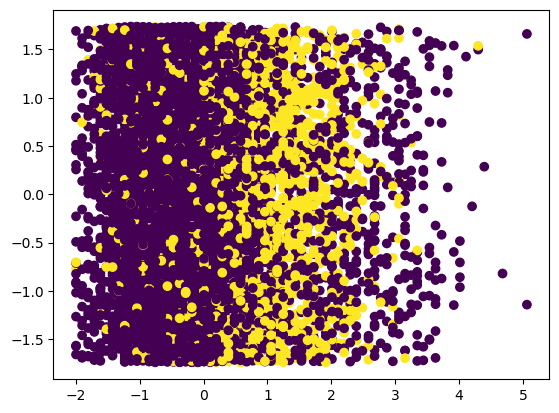

In [14]:
plt.scatter(Scale_Data[:,3],Scale_Data[:,9], c = Target)

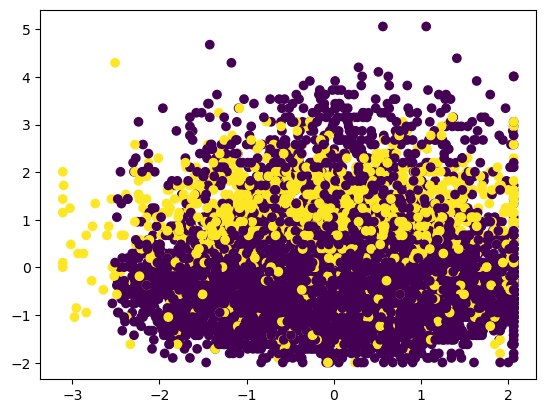

In [15]:
plt.scatter(Scale_Data[:,0],Scale_Data[:,3], c = Target)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(Data,Target,test_size=0.3,random_state=20)
p_grid={'n_neighbors':np.arange(1,40)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,p_grid,cv=5)
knn_cv.fit(Data,Target)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 24}
0.7964


In [22]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [24]:
y_pred = knn.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
mse

0.195

In [27]:
x_trainset,x_testset,y_trainset,y_testset=train_test_split(Scale_Data , Target , test_size=0.2)
bank_tree = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 4)

In [29]:
bank_tree.fit(x_trainset,y_trainset)
Target_pred = bank_tree.predict(x_testset)

In [30]:
mse = mean_squared_error(Target_pred,y_testset)
mse

0.163

In [87]:
New_customer = np.array([[0.1,2,1,0.2,0.3,0.4,0.4,1,1,0]])
predict = bank_tree.predict(New_customer)
predict

array([0], dtype=int64)